In [1]:
from __future__ import division
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn.apionly as sns

from composition.analysis.load_sim import load_sim
import composition.analysis.plotting_functions as plotting

%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Import ShowerLLH sim reconstructions and cuts to be made
df = load_sim()

/home/jbourbeau/composition/analysis/load_sim.py:53: RuntimeWarning: divide by zero encountered in log10
  cut_dict['min_energy'] = (np.log10(df['reco_energy']) > 6.2)
/home/jbourbeau/composition/analysis/load_sim.py:57: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))
/home/jbourbeau/composition/analysis/load_sim.py:59: RuntimeWarning: invalid value encountered in log10
  np.log10(df['InIce_charge_SRTCoincPulses']))


Cut event flow:
                   reco_exists:  0.788  0.788
                   reco_zenith:  0.652  0.652
                      min_hits:  0.626  0.516
         IceTopMaxSignalInEdge:   0.61  0.242
               IceTopMaxSignal:   0.56  0.229
      IceTopNeighbourMaxSignal:  0.522  0.217
                StationDensity:  0.787  0.217
              reco_containment:  0.498  0.172
                    min_energy:   0.52  0.132




In [3]:
MC_InIce_containment = df.InIce_FractionContainment
ShowerLLH_InIce_containment = df.reco_InIce_containment

/home/jbourbeau/composition/analysis/plotting_functions.py:58: RuntimeWarning: divide by zero encountered in log10
  h = np.log10(h)


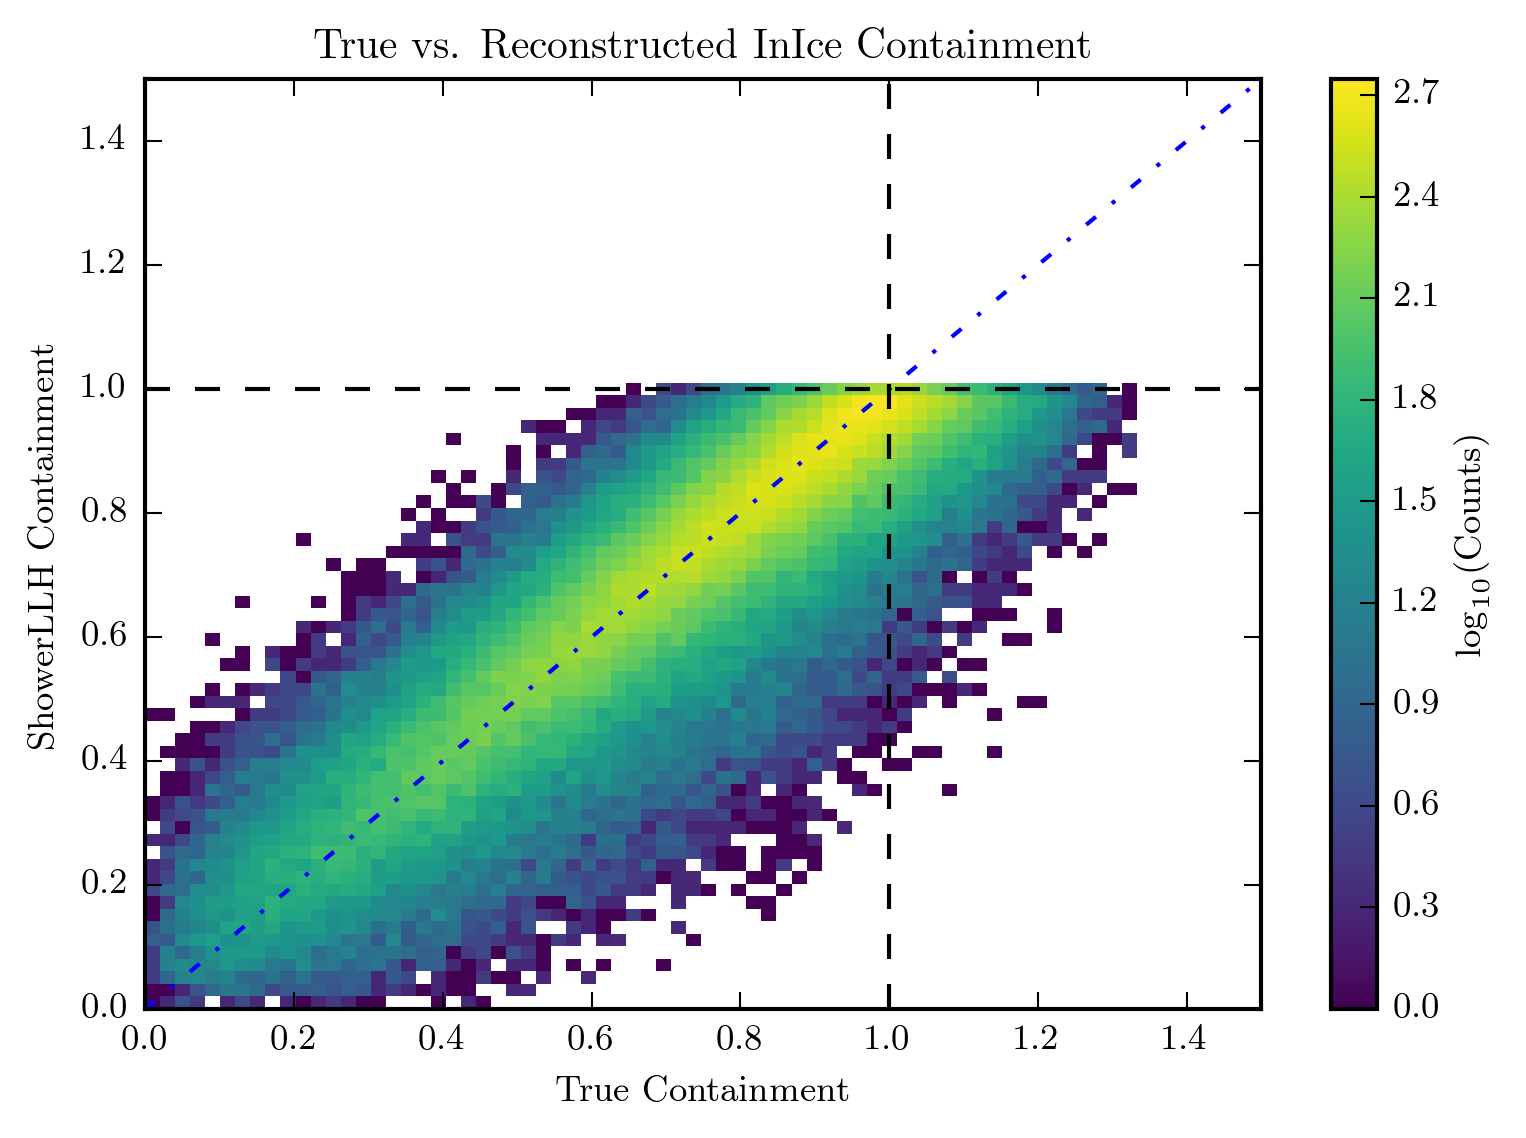

In [4]:
containment_bins = np.linspace(0, 2, 100)
fig, ax = plt.subplots()
plotting.histogram_2D(MC_InIce_containment, ShowerLLH_InIce_containment, containment_bins, log_counts=True)
plt.plot([0,10], [0,10], marker='None', linestyle='-.')
plt.axvline(x=1.0, color='k', marker='None', linestyle='--')
plt.axhline(y=1.0, color='k', marker='None', linestyle='--')
plt.xlim([0,1.5])
plt.ylim([0,1.5])
plt.xlabel('True Containment')
plt.ylabel('ShowerLLH Containment')
plt.title('True vs. Reconstructed InIce Containment')
plt.show()

In [5]:
MC_log_energy = df.MC_log_energy

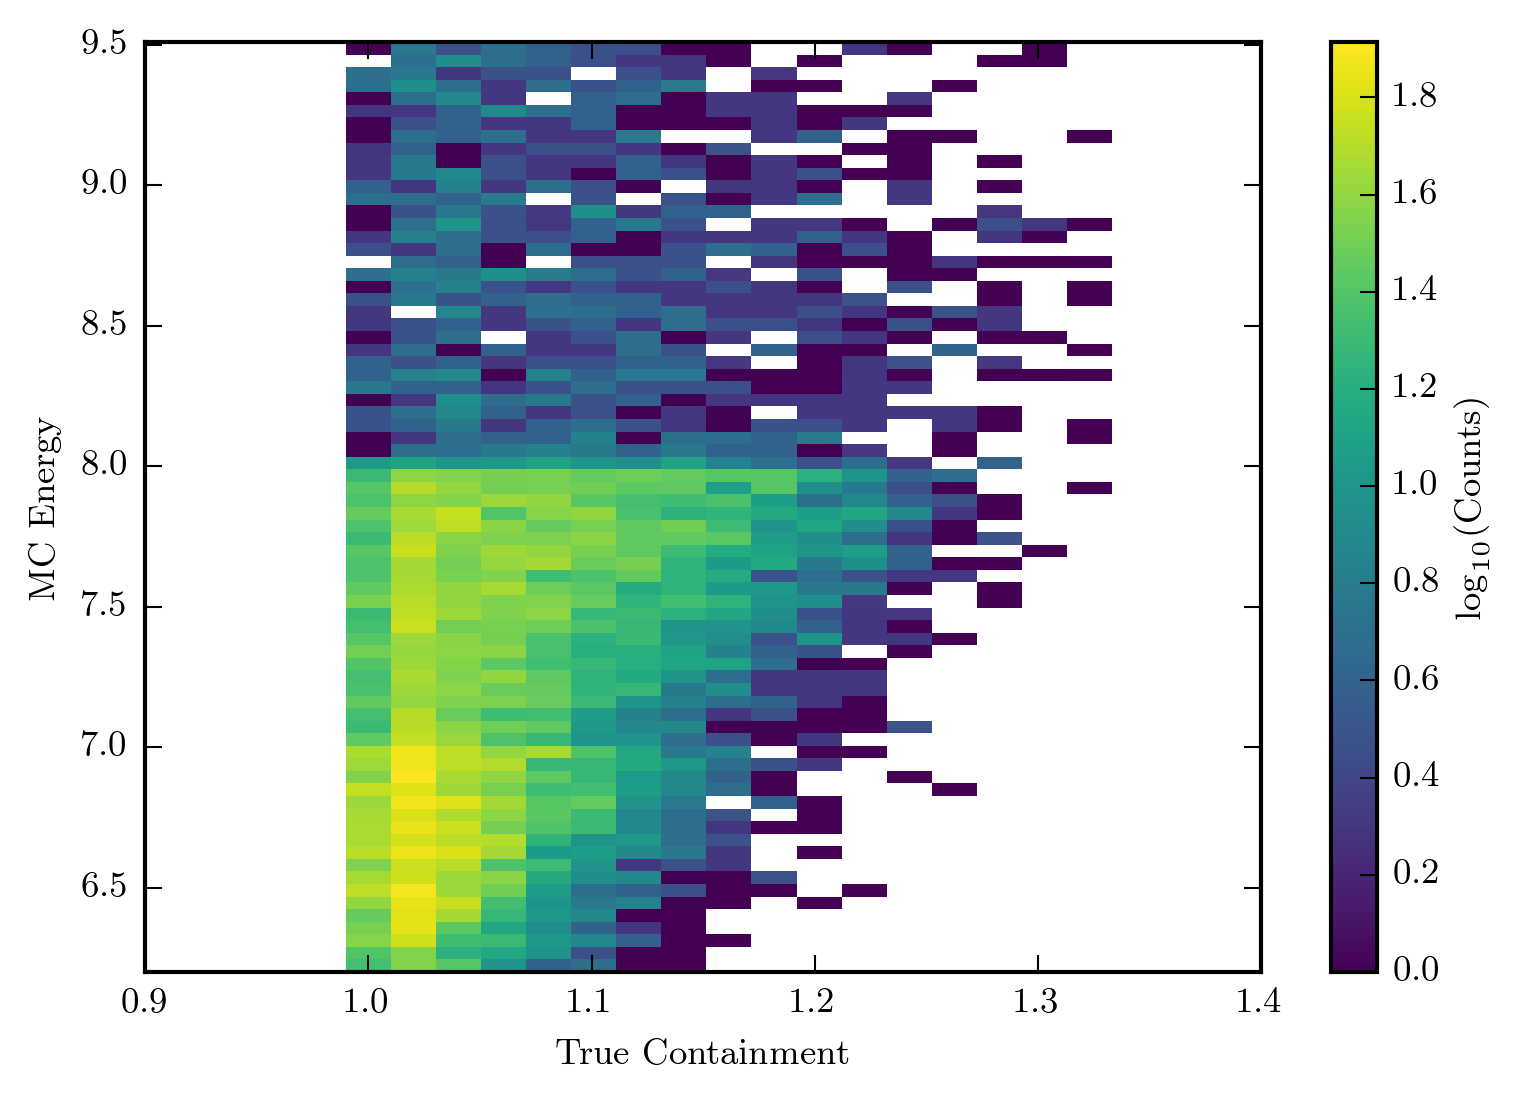

In [9]:
energy_bins = np.linspace(6.2, 9.51, 75)
fig, ax = plt.subplots()
uncontained_mask = (MC_InIce_containment >= 1.0)
plotting.histogram_2D(MC_InIce_containment[uncontained_mask],
                      MC_log_energy[uncontained_mask],
                      bins=[containment_bins, energy_bins], log_counts=True)
# plt.plot([0,10], [0,10], marker='None', linestyle='-.')
# plt.axvline(x=1.0, color='k', marker='None', linestyle='--')
# plt.axhline(y=1.0, color='k', marker='None', linestyle='--')
plt.xlim([0.9,1.4])
# plt.ylim([0,1.5])
plt.xlabel('True Containment')
plt.ylabel('MC Energy')
# plt.title('True vs. Reconstructed InIce Containment')
plt.show()

In [7]:
InIce_log_charge = df.InIce_log_charge

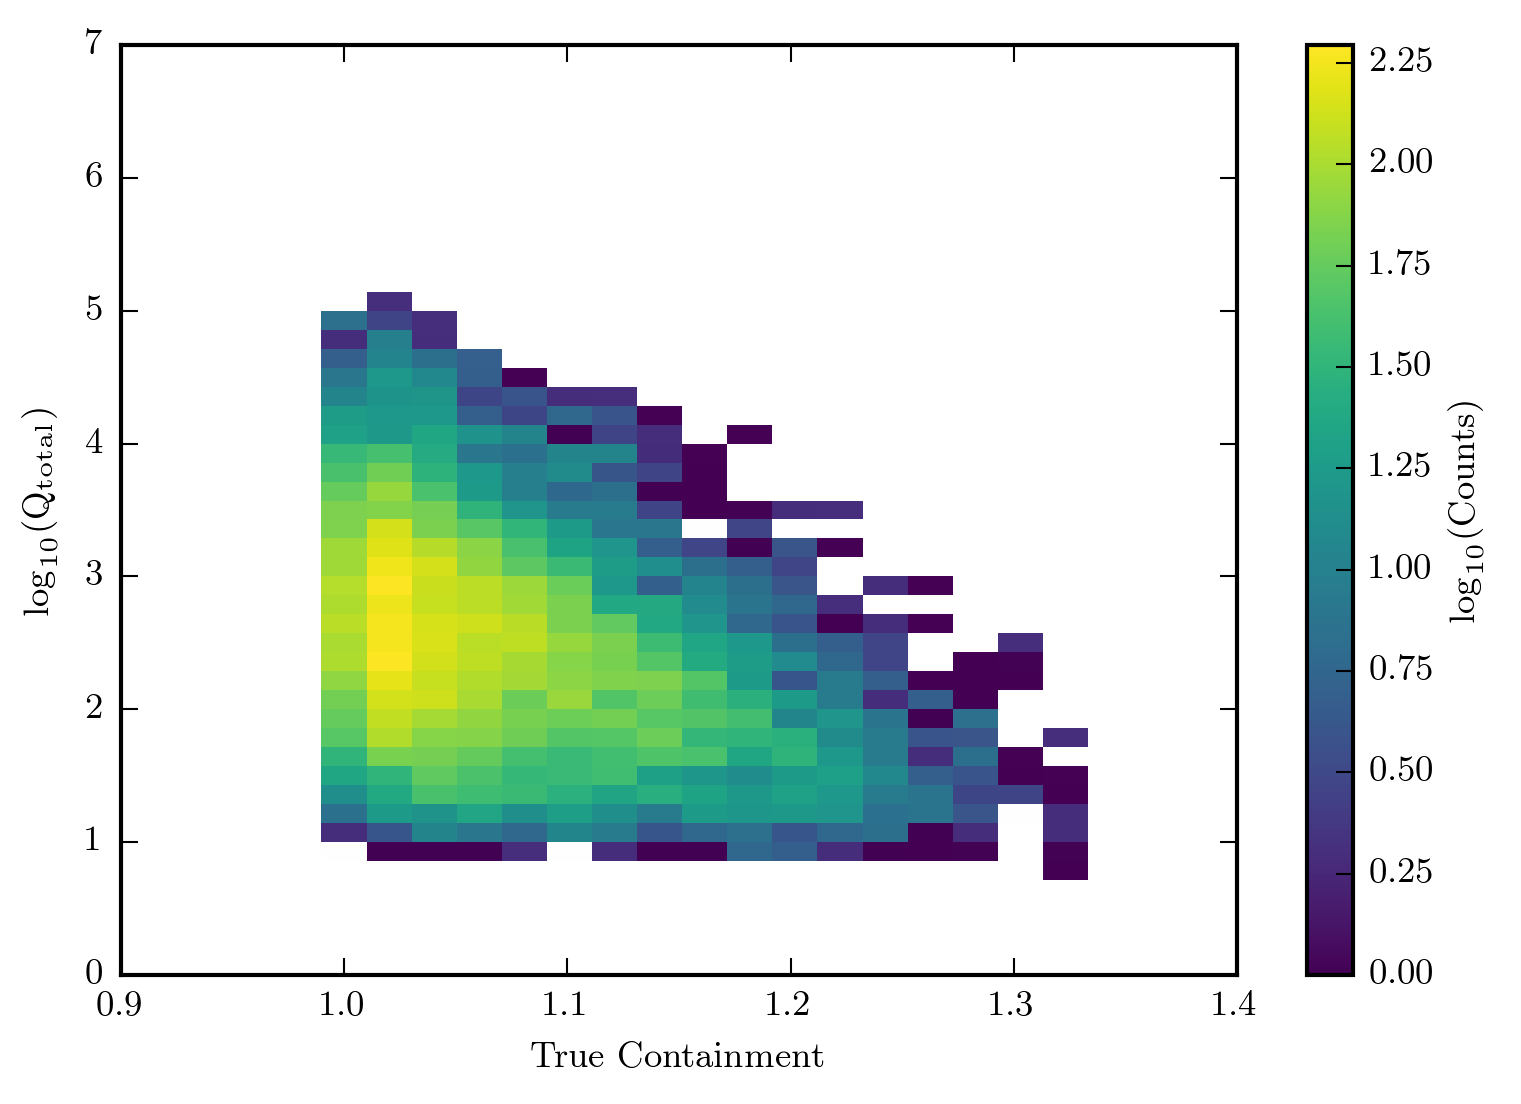

In [11]:
log_charge_bins = np.linspace(0, 7, 50)
fig, ax = plt.subplots()
uncontained_mask = (MC_InIce_containment >= 1.0)
plotting.histogram_2D(MC_InIce_containment[uncontained_mask],
                      InIce_log_charge[uncontained_mask],
                      bins=[containment_bins, log_charge_bins], log_counts=True)
# plt.plot([0,10], [0,10], marker='None', linestyle='-.')
# plt.axvline(x=1.0, color='k', marker='None', linestyle='--')
# plt.axhline(y=1.0, color='k', marker='None', linestyle='--')
plt.xlim([0.9,1.4])
# plt.ylim([0,1.5])
plt.xlabel('True Containment')
plt.ylabel('$\log_{10}(\mathrm{Q_{total}})$')
# plt.title('True vs. Reconstructed InIce Containment')
plt.show()

In [14]:
NChannels = df.NChannels_SRTCoincPulses

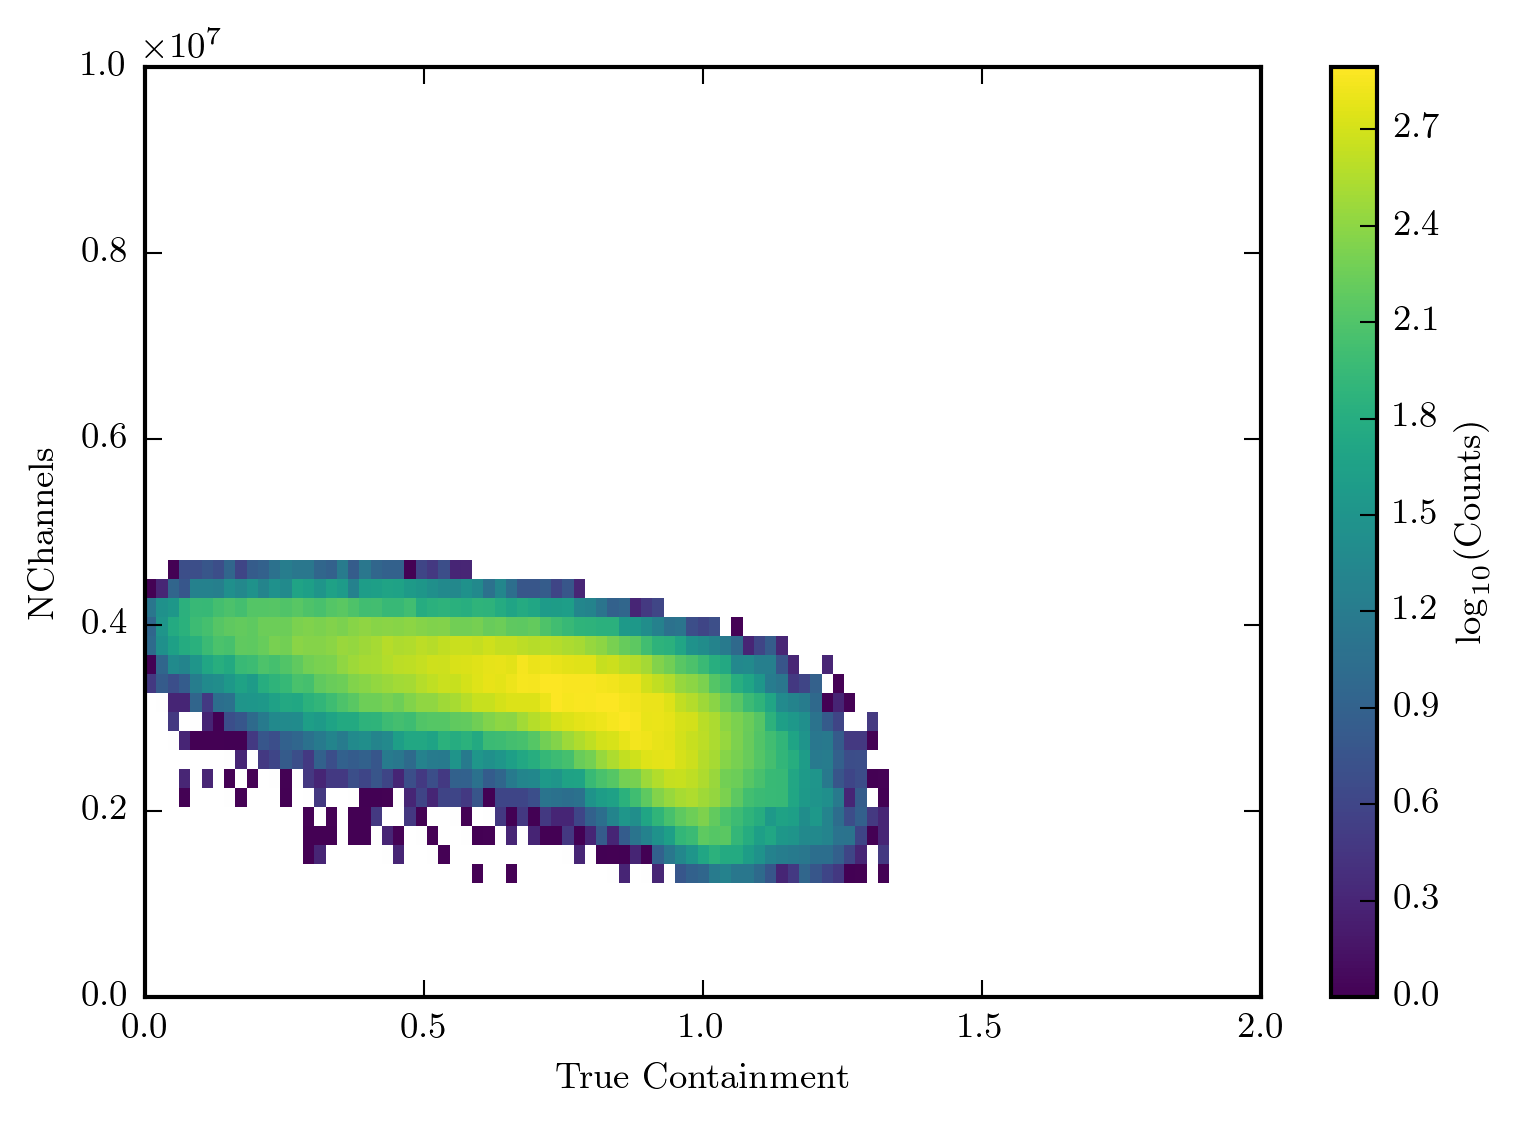

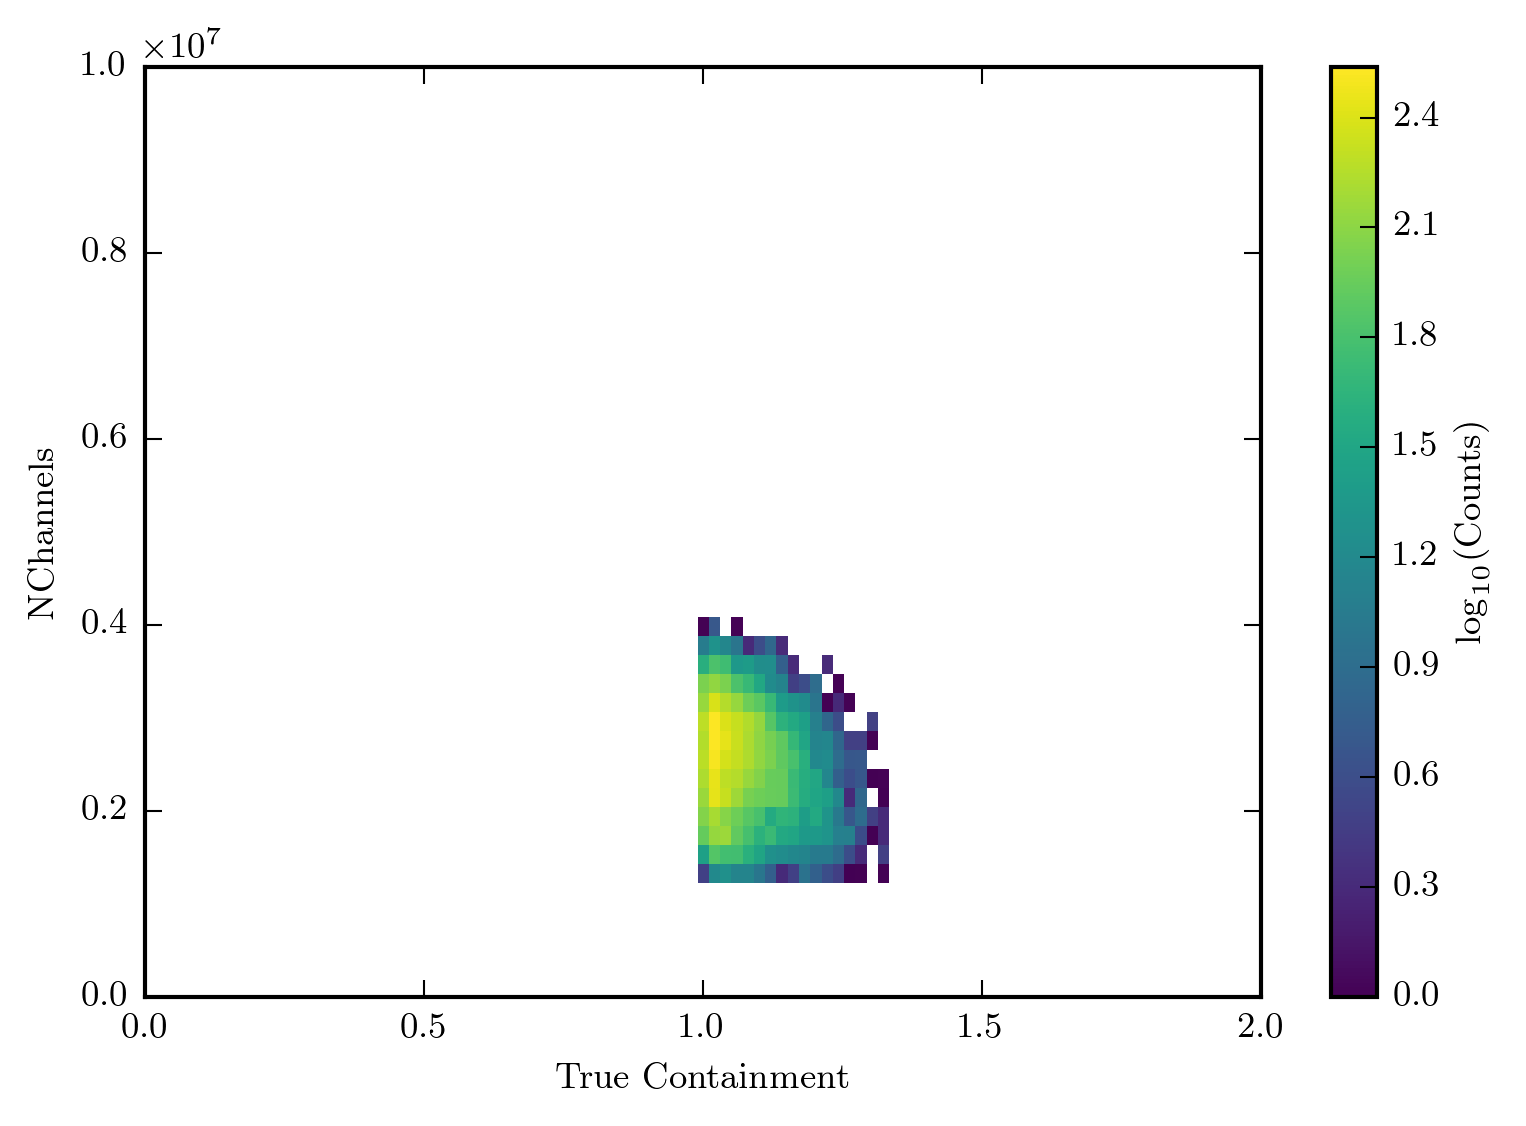

In [20]:
nchannels_bins = np.logspace(0, 7, 50)

fig, ax = plt.subplots()
plotting.histogram_2D(MC_InIce_containment,
                      NChannels,
                      bins=[containment_bins, nchannels_bins], log_counts=True)
# plt.plot([0,10], [0,10], marker='None', linestyle='-.')
# plt.axvline(x=1.0, color='k', marker='None', linestyle='--')
# plt.axhline(y=1.0, color='k', marker='None', linestyle='--')
# plt.xlim([0.9,1.4])
# plt.ylim([0,1.5])
plt.xlabel('True Containment')
plt.ylabel('NChannels')
# plt.title('True vs. Reconstructed InIce Containment')
plt.show()

fig, ax = plt.subplots()
uncontained_mask = (MC_InIce_containment >= 1.0)
plotting.histogram_2D(MC_InIce_containment[uncontained_mask],
                      NChannels[uncontained_mask],
                      bins=[containment_bins, nchannels_bins], log_counts=True)
# plt.plot([0,10], [0,10], marker='None', linestyle='-.')
# plt.axvline(x=1.0, color='k', marker='None', linestyle='--')
# plt.axhline(y=1.0, color='k', marker='None', linestyle='--')
# plt.xlim([0.9,1.4])
# plt.ylim([0,1.5])
plt.xlabel('True Containment')
plt.ylabel('NChannels')
# plt.title('True vs. Reconstructed InIce Containment')
plt.show()